# Importing packages and dependencies

In [ ]:
import tensorflow as tf
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing Data

In [ ]:
# loading mnist dataset & splitting into training and testing sets
mnist = tf.keras.datasets.mnist
(X_train,y_train),(X_test,y_test) = mnist.load_data()

# normalizing features 
X_train = tf.keras.utils.normalize(X_train,axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

# Creating model

In [ ]:
# Creating a model & specifing it's shape
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128 , activation = "relu") )
model.add(tf.keras.layers.Dense(128, activation = "relu") )
model.add(tf.keras.layers.Dense(128,activation = "sigmoid") )
model.compile(optimizer = "adam" , loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [ ]:
# Model training
model.fit(X_train,y_train,epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0166 - accuracy: 0.9945
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0112 - accuracy: 0.9962
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0135 - accuracy: 0.9953
Epoch 4/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0099 - accuracy: 0.9966
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0105 - accuracy: 0.9966
Epoch 6/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0090 - accuracy: 0.9969
Epoch 7/20
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0099 - accuracy: 0.9966
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0076 - accuracy: 0.9973
Epoch 9/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0080 - accuracy: 0.9973
Epoch 10/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.008

In [ ]:
# Saving model
model.save("handwritten_digit_recognition_model.model")

In [ ]:
model = tf.keras.models.load_model("handwritten_digit_recognition_model.model")

# Model evaluation

In [ ]:
#  printing out the model's loss & accuracy
score = model.evaluate(X_test,y_test, verbose = 0 )
print("model's loss : ", score[0])
print("model's accuracy : ",score[1])

model's loss :  0.1908019334077835
model's accuracy :  0.9732999801635742


# Testing model with new images

The number is probably 3


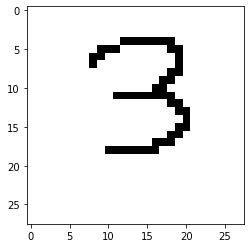

The number is probably 3


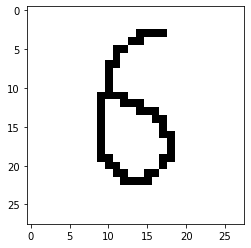

The number is probably 2


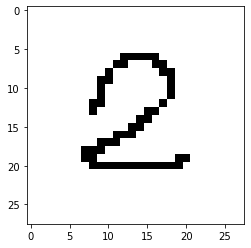

The number is probably 3


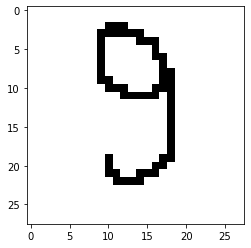

The number is probably 1


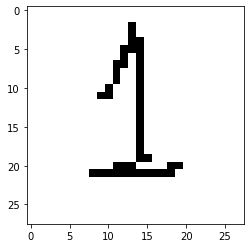

The number is probably 1


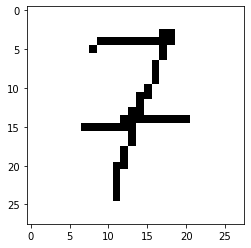

The number is probably 7


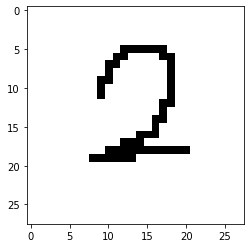

The number is probably 8


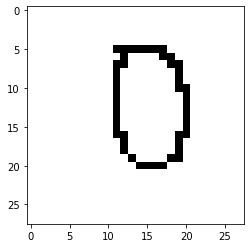

The number is probably 3


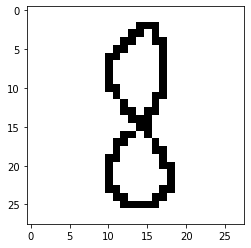

In [ ]:
image_number = 1
while os.path.isfile("/content/digits/digit{}.png".format(image_number)) :
  try :  
    img = cv2.imread("/content/digits/digit{}.png".format(image_number))[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print("The number is probably {}".format(np.argmax(prediction)))
    plt.imshow(img[0], cmap = plt.cm.binary)
    plt.show()
  except :
    print("error")
  finally :
    image_number += 1